In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Since our data has multiple features we are going to use multivariate or dependent multi-series forecasting methods

In [ ]:
# clean_METData = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/clean_METData.csv')
data = clean_METData[['date','T2M_RANGE','T2M_MIN','WS10M_MAX','PRECTOTCORR','SPI']]
data.head()

,date,T2M_RANGE,T2M_MIN,WS10M_MAX,PRECTOTCORR,SPI
0,1991-01-29,-257.431429,14.625429,8.362857,0.530000,0.644588
1,1991-02-05,-257.098571,14.680000,8.398000,0.329714,0.551844
2,1991-02-12,-257.569143,15.220286,8.444000,0.428857,0.554402
3,1991-02-19,-258.402286,16.105714,8.074857,0.562857,0.778456
4,1991-02-26,-257.958571,15.976857,8.043429,0.442571,0.649131


In [ ]:
# Data preparation
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('7D')
data = data.sort_index()
data.head()

,T2M_RANGE,T2M_MIN,WS10M_MAX,PRECTOTCORR,SPI
date,,,,,
1991-01-29,-257.431429,14.625429,8.362857,0.530000,0.644588
1991-02-05,-257.098571,14.680000,8.398000,0.329714,0.551844
1991-02-12,-257.569143,15.220286,8.444000,0.428857,0.554402
1991-02-19,-258.402286,16.105714,8.074857,0.562857,0.778456
1991-02-26,-257.958571,15.976857,8.043429,0.442571,0.649131


In [ ]:
# Split data into train-val-test
# ==============================================================================
end_train = '2020-01-01 '
data_train = data.loc[:end_train, :].copy()
data_test  = data.loc[end_train:, :].copy()

print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()}   "
    f"(n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}   "
    f"(n={len(data_test)})"
)

Train dates : 1991-01-29 00:00:00 --- 2019-12-31 00:00:00   (n=1510)
Test dates  : 2020-01-07 00:00:00 --- 2023-03-28 00:00:00   (n=169)


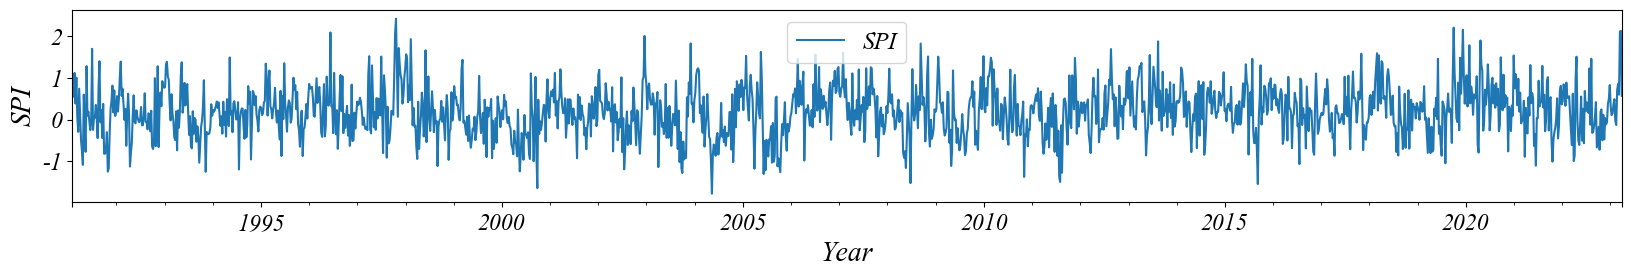

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
rdata['SPI'].plot(ax=ax)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2 )
ax.set_ylabel("SPI",fontdict = font2)
ax.legend(fontsize=17)

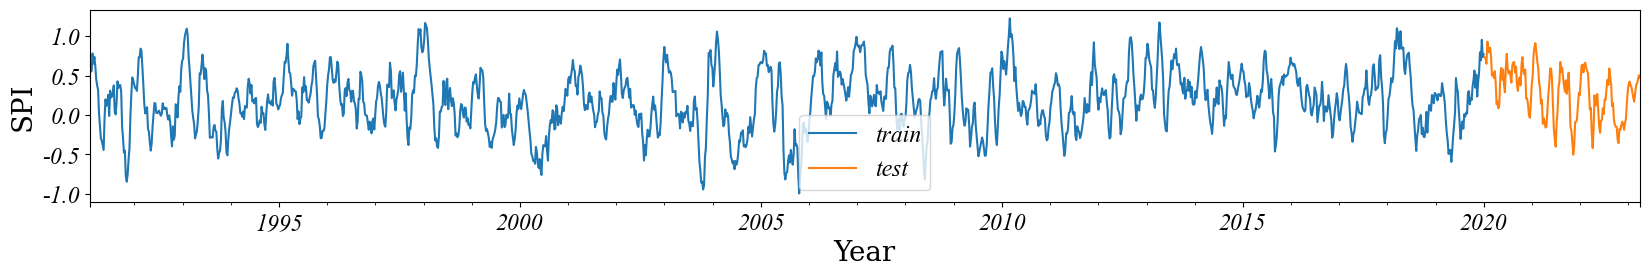

In [ ]:
# Plot
# ==============================================================================
#define font family to use for all text
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['font.family'] = 'Times New Roman'

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
data_train['SPI'].plot(ax=ax, label='train')
data_test['SPI'].plot(ax=ax, label='test')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("SPI",fontdict = font2)
ax.legend(fontsize=17);

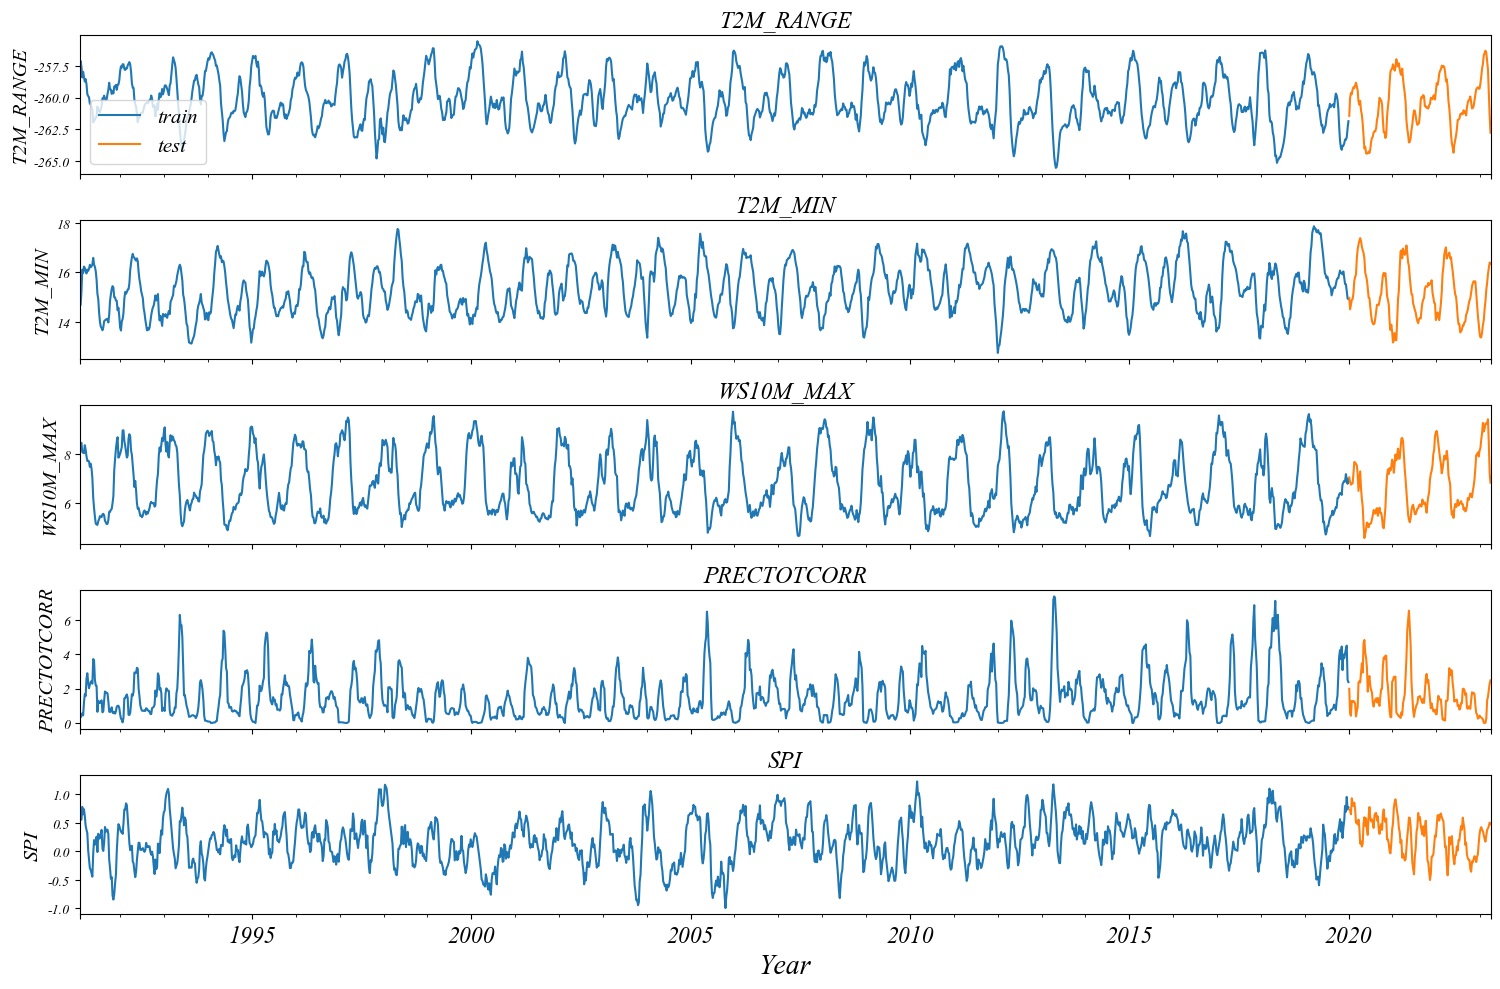

In [ ]:
# Plot time series
# ==============================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharex=True)
font2 = {'family':'serif','color':'black','size':20}

data_train['T2M_RANGE'].plot(label='train', ax=axes[0])
data_test['T2M_RANGE'].plot(label='test', ax=axes[0])
axes[0].set_xlabel('Year',fontdict = font2)
axes[0].set_ylabel('T2M_RANGE',fontsize=15)
axes[0].set_title('T2M_RANGE',fontsize=17)
axes[0].legend(fontsize=15)

data_train['T2M_MIN'].plot(label='train', ax=axes[1])
data_test['T2M_MIN'].plot(label='test', ax=axes[1])
axes[1].set_xlabel('Year',fontdict = font2)
axes[1].set_ylabel('T2M_MIN',fontsize=15)
axes[1].set_title('T2M_MIN',fontsize=17)

data_train['WS10M_MAX'].plot(label='train', ax=axes[2])
data_test['WS10M_MAX'].plot(label='test', ax=axes[2])
axes[2].set_xlabel('Year',fontdict = font2)
axes[2].set_ylabel('WS10M_MAX',fontsize=15)
axes[2].set_title('WS10M_MAX',fontsize=17)

data_train['PRECTOTCORR'].plot(label='train', ax=axes[3])
data_test['PRECTOTCORR'].plot(label='test', ax=axes[3])
axes[3].set_xlabel('Year',fontdict = font2)
axes[3].set_ylabel('PRECTOTCORR', fontsize=15)
axes[3].set_title('PRECTOTCORR',fontsize=17)

data_train['SPI'].plot(label='train', ax=axes[4])
data_test['SPI'].plot(label='test', ax=axes[4])
axes[4].set_xlabel('Year',fontdict = font2)
axes[4].set_ylabel('SPI',fontsize=15)
axes[4].set_title('SPI',fontsize=17)
plt.xticks(fontsize=17)
fig.tight_layout()
plt.show();

#### LSTM 30-lag  single-step

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import seaborn as sns

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in, n_out, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df=DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  agg = concat(cols, axis=1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace=True)
  return agg



In [ ]:
values = data.values
values = values.astype('float32')


In [ ]:
# normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
scaled

array([[ 1.4404309 , -0.68009806,  1.2903532 , -0.74797165,  1.2366027 ],
       [ 1.6150723 , -0.6247803 ,  1.3190717 , -0.9045287 ,  0.98463404],
       [ 1.3681693 , -0.0771126 ,  1.3566629 , -0.8270318 ,  0.99158436],
       ...,
       [ 0.2771531 ,  0.8928198 ,  1.3382175 ,  0.33755904,  0.6843809 ],
       [-0.670573  ,  1.1155351 ,  0.34007618,  0.6378479 ,  0.8528582 ],
       [-1.3641428 ,  1.0624398 ,  0.0417625 ,  0.77839917,  0.77768433]],
      dtype=float32)

In [ ]:
# frame as supervised learning
# specify the number of lag hours
lag = 25
n_features = 5
n_steps=1

reframed = series_to_supervised(scaled, lag, n_steps)
print(reframed.shape)
reframed

(1654, 130)


,var1(t-25),var2(t-25),var3(t-25),var4(t-25),var5(t-25),var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
25,1.440431,-0.680098,1.290353,-0.747972,1.236603,1.615072,-0.624780,1.319072,-0.904529,0.984634,...,-0.513465,-1.311466,-1.063859,-0.249267,0.118470,-0.389485,-1.509564,-1.099582,-0.174450,0.278283
26,1.615072,-0.624780,1.319072,-0.904529,0.984634,1.368169,-0.077113,1.356663,-0.827032,0.991584,...,-0.389485,-1.509564,-1.099582,-0.174450,0.278283,-0.258316,-1.571833,-1.093044,-0.129337,0.503132
27,1.368169,-0.077113,1.356663,-0.827032,0.991584,0.931045,0.820415,1.055002,-0.722288,1.600294,...,-0.258316,-1.571833,-1.093044,-0.129337,0.503132,0.056334,-1.662484,-1.004087,-0.675165,-0.389728
28,0.931045,0.820415,1.055002,-0.722288,1.600294,1.163858,0.689797,1.029319,-0.816312,1.248946,...,0.056334,-1.662484,-1.004087,-0.675165,-0.389728,0.057983,-1.543450,-0.989144,-0.620225,-0.496905
29,1.163858,0.689797,1.029319,-0.816312,1.248946,0.942590,0.948137,1.015777,-0.224700,1.484994,...,0.057983,-1.543450,-0.989144,-0.620225,-0.496905,0.175814,-1.291192,-1.040277,-0.133580,-0.093501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,-0.645242,-1.026481,-0.885244,0.192264,-0.101059,-0.298041,-0.935541,-0.715268,-0.473494,-0.664690,...,1.960912,-0.005576,1.986367,-0.951875,0.245739,1.606378,0.286648,2.021857,-0.127550,0.513460
1675,-0.298041,-0.935541,-0.715268,-0.473494,-0.664690,-0.114865,-0.819114,-0.464974,-0.513471,-0.854233,...,1.606378,0.286648,2.021857,-0.127550,0.513460,1.250642,0.647223,2.138598,0.037270,0.571916
1676,-0.114865,-0.819114,-0.464974,-0.513471,-0.854233,-0.013670,-0.596688,-0.535019,-0.408058,-0.918822,...,1.250642,0.647223,2.138598,0.037270,0.571916,0.277153,0.892820,1.338217,0.337559,0.684381
1677,-0.013670,-0.596688,-0.535019,-0.408058,-0.918822,0.020211,-0.444638,-0.422714,-0.427264,-0.927572,...,0.277153,0.892820,1.338217,0.337559,0.684381,-0.670573,1.115535,0.340076,0.637848,0.852858


In [ ]:
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
#print(reframed.head())

In [ ]:
# split into train and test sets
values = reframed.values
n_train_weeks = 30 * 12 * 4
train = values[:n_train_weeks, :]
test = values[n_train_weeks:, :]

In [ ]:
# split into input and outputs
n_obs = lag * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features:]
test_X, test_y = test[:, :n_obs], test[:, -n_features:]
print(train_X.shape, len(train_X), train_y.shape)


(1440, 125) 1440 (1440, 5)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag, n_features))
test_X = test_X.reshape((test_X.shape[0], lag, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1440, 25, 5) (1440, 5) (214, 25, 5) (214, 5)


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
def build_LSTMmodel(hp):
    model = keras.Sequential()
    # Tune the number of layers.
    model.add(LSTM(units=hp.Int("units", min_value=32, max_value=512, step=32),
                activation="relu",input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(rate=hp.Choice('rate', [0.01,0.1,0.15,0.2,0.25,0.3])))
    model.add(Dense(train_y.shape[1]))
    #learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile( optimizer=hp.Choice("optimizers",['SGD', 'RMSprop', 'Adam']),
        loss="mse" )
    return model
#hp.Choice("activation", ["relu", "tanh"])

build_LSTMmodel(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_LSTMmodel,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Perform hypertuning
tuner.search(train_X, train_y, epochs=100, validation_split=0.1,callbacks=[stop_early])
best_hp=tuner.get_best_hyperparameters()[0]

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3], 'ordered': True}
optimizers (Choice)
{'default': 'SGD', 'conditions': [], 'values': ['SGD', 'RMSprop', 'Adam'], 'ordered': False}


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 3 summary
Hyperparameters:
units: 416
rate: 0.25
optimizers: RMSprop
Score: 0.10579479485750198

Trial 0 summary
Hyperparameters:
units: 192
rate: 0.3
optimizers: RMSprop
Score: 0.1094871312379837

Trial 2 summary
Hyperparameters:
units: 128
rate: 0.1
optimizers: Adam
Score: 0.11341866850852966

Trial 1 summary
Hyperparameters:
units: 352
rate: 0.01
optimizers: SGD
Score: 0.1341453641653061

Trial 4 summary
Hyperparameters:
units: 224
rate: 0.15
optimizers: SGD
Score: 0.1697665899991989


In [ ]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()
history=h_model.fit(test_X, test_y, epochs=50, validation_split=0.1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 416)               702208    
                                                                 
 dropout_11 (Dropout)        (None, 416)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 2085      
                                                                 
Total params: 704293 (2.69 MB)
Trainable params: 704293 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 7s 523ms/step - loss: 0.7702 - val_loss: 0.7553
Epoch 2/50
6/6 [==============================] - 2s 285ms/step - loss: 0.5326 - val_loss: 0.6497
Epoch 3/50
6/6 [==============================] - 1s 230ms/step - loss: 0.4293 - val_

In [ ]:
h_eval_dict = h_model.evaluate(test_X, test_y, return_dict=True)

7/7 [==============================] - 0s 38ms/step - loss: 0.0925


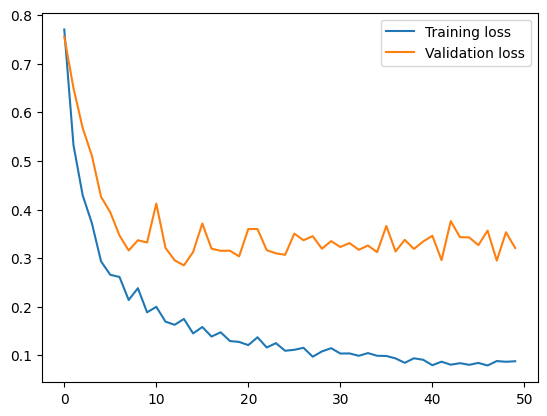

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
# make a prediction
yhat = h_model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], n_week*n_features))

7/7 [==============================] - 0s 39ms/step


In [ ]:
X = test_X.reshape((test_X.shape[0], lag*n_features))
a=pd.DataFrame(yhat)
a

,0,1,2,3,4
0,1.248747,1.739461,1.537677,-1.005452,0.231302
1,1.189327,2.013418,1.492293,-0.987316,0.013062
2,1.083106,2.243726,1.393609,-0.881380,-0.274072
3,0.963327,2.381316,1.274624,-0.731585,-0.613964
4,0.848310,2.451853,1.175951,-0.559536,-1.011999
...,...,...,...,...,...
209,1.600186,0.693085,1.165146,-0.801011,0.407223
210,1.387881,0.913956,1.141039,-0.729569,0.278408
211,1.193995,1.089268,1.130415,-0.661173,0.155431
212,0.866502,1.144618,0.942492,-0.441680,0.053285


In [ ]:
a.rename(columns={4:5}, inplace=True)
b=pd.DataFrame(X[:, -4:])
b

,0,1,2,3
0,1.523899,2.129959,-1.097712,0.579837
1,1.801353,1.891106,-1.082972,0.348012
2,2.330485,1.478308,-1.050589,0.167193
3,2.477322,1.212837,-1.047239,-0.146588
4,2.598092,1.262569,-1.059299,-0.698224
...,...,...,...,...
209,-0.005576,1.986367,-0.951875,0.245739
210,0.286648,2.021857,-0.127550,0.513460
211,0.647223,2.138598,0.037270,0.571916
212,0.892820,1.338217,0.337559,0.684381


In [ ]:
inv_yhat = b.join(a[5])
inv_yhat

,0,1,2,3,5
0,1.523899,2.129959,-1.097712,0.579837,0.231302
1,1.801353,1.891106,-1.082972,0.348012,0.013062
2,2.330485,1.478308,-1.050589,0.167193,-0.274072
3,2.477322,1.212837,-1.047239,-0.146588,-0.613964
4,2.598092,1.262569,-1.059299,-0.698224,-1.011999
...,...,...,...,...,...
209,-0.005576,1.986367,-0.951875,0.245739,0.407223
210,0.286648,2.021857,-0.127550,0.513460,0.278408
211,0.647223,2.138598,0.037270,0.571916,0.155431
212,0.892820,1.338217,0.337559,0.684381,0.053285


In [ ]:
inv_yhat=inv_yhat.values
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,4]

In [ ]:
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
c=pd.DataFrame(test_y)
c.rename(columns={4:5}, inplace=True)
d=pd.DataFrame(X[:, -4:])

In [ ]:
inv_y = d.join(c[5])
inv_y

,0,1,2,3,5
0,1.523899,2.129959,-1.097712,0.579837,0.348012
1,1.801353,1.891106,-1.082972,0.348012,0.167193
2,2.330485,1.478308,-1.050589,0.167193,-0.146588
3,2.477322,1.212837,-1.047239,-0.146588,-0.698224
4,2.598092,1.262569,-1.059299,-0.698224,-1.115017
...,...,...,...,...,...
209,-0.005576,1.986367,-0.951875,0.245739,0.513460
210,0.286648,2.021857,-0.127550,0.513460,0.571916
211,0.647223,2.138598,0.037270,0.571916,0.684381
212,0.892820,1.338217,0.337559,0.684381,0.852858


In [ ]:
inv_y=inv_y.values
inv_y = scaler.inverse_transform(inv_y)
testy=inv_y
inv_y = testy[:,4]

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.133


In [ ]:
ypred = pd.DataFrame(a[5])
ypred=ypred.rename(columns={5:'spi_pred'})
ypred

,spi_pred
0,0.231302
1,0.013062
2,-0.274072
3,-0.613964
4,-1.011999
...,...
209,0.407223
210,0.278408
211,0.155431
212,0.053285


In [ ]:
ypred['spi']=c[5]
ypred['date'] = pd.to_datetime(data.index[-(ypred.shape[0]):], format='%Y/%m/%d')
ypred=ypred.set_index('date')
ypred

,spi_pred,spi
date,,
2019-02-26,0.231302,0.348012
2019-03-05,0.013062,0.167193
2019-03-12,-0.274072,-0.146588
2019-03-19,-0.613964,-0.698224
2019-03-26,-1.011999,-1.115017
...,...,...
2023-02-28,0.407223,0.513460
2023-03-07,0.278408,0.571916
2023-03-14,0.155431,0.684381


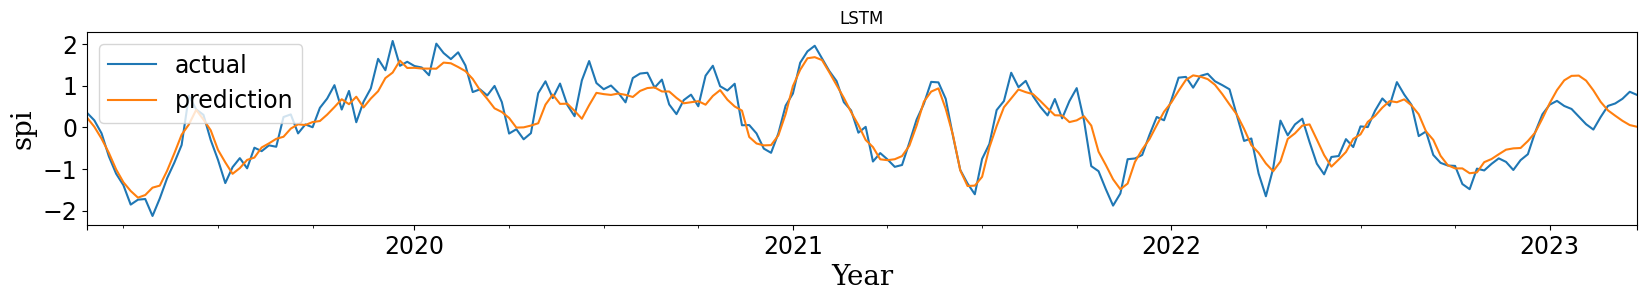

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
ypred['spi'].plot(ax=ax, label='actual', title='LSTM')
ypred['spi_pred'].plot(ax=ax, label='prediction')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("spi",fontdict = font2)
ax.legend(fontsize=17);

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(ypred['spi'],ypred['spi_pred'])
mse = mean_squared_error(ypred['spi'],ypred['spi_pred'])
r2 = r2_score(ypred['spi'],ypred['spi_pred'])
rmse = math.sqrt(mean_squared_error(ypred['spi'],ypred['spi_pred']))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

The model performance for testing set:
--------------------------------------

MAE is 0.24818629026412964
MSE is 0.11212587356567383
R2 is 0.8689016304675864
RMSE is 0.3348520174131759


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(inv_y, inv_yhat)
mse = mean_squared_error(inv_y, inv_yhat)
r2 = r2_score(inv_y, inv_yhat)
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

The model performance for testing set:
--------------------------------------

MAE is 0.09135230630636215
MSE is 0.015191104263067245
R2 is 0.8689016324403355
RMSE is 0.12325219780217814


##### forcasting

In [ ]:
test_X.shape

(209, 30, 5)

In [ ]:
#X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
#Taking the last 100 days values as input to predic future values
x_input=test_X[-1:]
x_input.shape

(1, 30, 5)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#from numpy import zeros, newaxis
#output=[]
#n_steps=1
#i=1
#while(i<=300):
 # x_input=np.array(temp_input)
 # x_input = x_input[newaxis,:, :]
  #print("{} input: \n\n{}".format(i,x_input))

  #print(x_input)
  #yhat = model.predict(x_input, verbose=0)
  #print("\n{} th output: {}\n\n\n".format(i,yhat))

#  output.append(yhat.tolist())
 # temp_input=yhat
  #i=i+1

In [ ]:
# demonstrate prediction for next 5 year
from numpy import array
from numpy import zeros, newaxis

output=[]
#n_steps=100
i=1
while(i<=300):

    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} input: \n\n{}".format(i,x_input))
        x_input = x_input[newaxis,:,:]
        #print(x_input)
        yhat = h_model.predict(x_input)
        print("\n{} th output: {}\n\n\n".format(i,yhat))

        temp_input.append(yhat.tolist())
        temp_input=temp_input
        #print(temp_input)
        output.append(yhat.tolist())
        i=i+1
    else:
      #x_input = x_input[newaxis,:, :]
      yhat = h_model.predict(x_input)

      print(yhat[0])
      temp_input.append(yhat.tolist())
      print(len(temp_input))
      output.append(yhat.tolist())
      i=i+1


1/1 [==============================] - 0s 35ms/step
[ 0.46158186  0.8877928   0.6037598  -0.05897784 -0.00640815]
31
2 input: 

[list([-0.6452422738075256, -1.0264812707901, -0.8852439522743225, 0.19226385653018951, -0.10105927288532257])
 list([-0.2980410158634186, -0.9355413317680359, -0.7152683138847351, -0.47349435091018677, -0.6646901369094849])
 list([-0.11486531794071198, -0.8191142082214355, -0.4649741053581238, -0.5134711265563965, -0.8542328476905823])
 list([-0.013670353218913078, -0.5966878533363342, -0.5350191593170166, -0.4080575108528137, -0.9188215732574463])
 list([0.020210744813084602, -0.44463759660720825, -0.4227135181427002, -0.4272642135620117, -0.9275723099708557])
 list([0.1420770287513733, -0.3531186282634735, -0.31764596700668335, -0.5170444846153259, -1.363007664680481])
 list([-0.12386398762464523, -0.11041850596666336, -0.4145418107509613, -0.10946010798215866, -1.4874714612960815])
 list([-0.356964647769928, 0.13604693114757538, -0.44115880131721497, 0.235

IndexError: ignored

In [ ]:
print(output)

[[[0.46158185601234436, 0.8877928256988525, 0.6037598252296448, -0.05897784233093262, -0.006408148445188999]]]


In [ ]:
len(output)

300

In [ ]:
 train_date=pd.to_datetime(data.index, format='%Y/%m/%d')

In [ ]:
n_week_for_prediction=300  #let us predict 1 year

predict_period_dates = pd.date_range(list(train_date)[-1], periods=n_week_for_prediction, freq='7D').tolist()
print(predict_period_dates)


[Timestamp('2023-03-28 00:00:00', freq='7D'), Timestamp('2023-04-04 00:00:00', freq='7D'), Timestamp('2023-04-11 00:00:00', freq='7D'), Timestamp('2023-04-18 00:00:00', freq='7D'), Timestamp('2023-04-25 00:00:00', freq='7D'), Timestamp('2023-05-02 00:00:00', freq='7D'), Timestamp('2023-05-09 00:00:00', freq='7D'), Timestamp('2023-05-16 00:00:00', freq='7D'), Timestamp('2023-05-23 00:00:00', freq='7D'), Timestamp('2023-05-30 00:00:00', freq='7D'), Timestamp('2023-06-06 00:00:00', freq='7D'), Timestamp('2023-06-13 00:00:00', freq='7D'), Timestamp('2023-06-20 00:00:00', freq='7D'), Timestamp('2023-06-27 00:00:00', freq='7D'), Timestamp('2023-07-04 00:00:00', freq='7D'), Timestamp('2023-07-11 00:00:00', freq='7D'), Timestamp('2023-07-18 00:00:00', freq='7D'), Timestamp('2023-07-25 00:00:00', freq='7D'), Timestamp('2023-08-01 00:00:00', freq='7D'), Timestamp('2023-08-08 00:00:00', freq='7D'), Timestamp('2023-08-15 00:00:00', freq='7D'), Timestamp('2023-08-22 00:00:00', freq='7D'), Timestamp

In [ ]:
predict_period_dates = pd.to_datetime(predict_period_dates)

In [ ]:
prediction=np.array(output)

In [ ]:
y_pred_future=prediction

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
y_pred_future=np.array(y_pred_future)
y_pred_future = y_pred_future.reshape(len(y_pred_future),-1)

In [ ]:
y_pred_future = scaler.inverse_transform(y_pred_future)

In [ ]:
df_forecast = pd.DataFrame(y_pred_future, columns = ['trange_pred','tmin_pred','wmax_pred','P_pred','SPI_pred'])
df_forecast

,trange_pred,tmin_pred,wmax_pred,P_pred,SPI_pred
0,-261.623106,16.430124,6.717847,2.514435,0.419146
1,-261.820473,16.369230,6.460941,2.560992,0.271414
2,-261.965528,16.319627,6.283487,2.623017,0.143908
3,-262.130196,16.268084,6.120977,2.673472,0.056110
4,-262.299463,16.199053,5.957988,2.670749,0.013313
...,...,...,...,...,...
295,-257.808375,14.240255,8.042064,0.484376,0.346057
296,-257.576350,14.347562,8.074912,0.430690,0.362159
297,-257.403257,14.508950,8.102466,0.407155,0.376563
298,-257.279626,14.711155,8.129019,0.400034,0.385353


In [ ]:
df_forcdate = pd.DataFrame({'Date':np.array(forecast_dates).flatten()})
df_forcdate

,Date
0,2023-03-28
1,2023-04-04
2,2023-04-11
3,2023-04-18
4,2023-04-25
...,...
295,2028-11-21
296,2028-11-28
297,2028-12-05
298,2028-12-12


In [ ]:
df_forecast['Date'] = df_forcdate['Date']
df_forecast=df_forecast.set_index('Date')
df_forecast.head()

,trange_pred,tmin_pred,wmax_pred,P_pred,SPI_pred
Date,,,,,
2023-03-28,-261.623106,16.430124,6.717847,2.514435,0.419146
2023-04-04,-261.820473,16.369230,6.460941,2.560992,0.271414
2023-04-11,-261.965528,16.319627,6.283487,2.623017,0.143908
2023-04-18,-262.130196,16.268084,6.120977,2.673472,0.056110
2023-04-25,-262.299463,16.199053,5.957988,2.670749,0.013313


Text(0, 0.5, 'SPI')

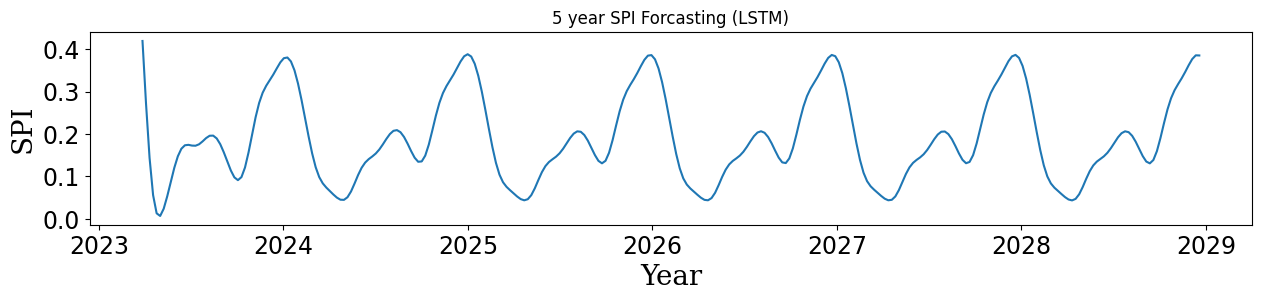

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
df_forecast['SPI_pred'].plot(figsize=(15, 2.5),title='5 year SPI Forcasting (LSTM)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("SPI",fontdict = font2)
#ax.legend(fontsize=17);

Text(0, 0.5, 'Precipitation')

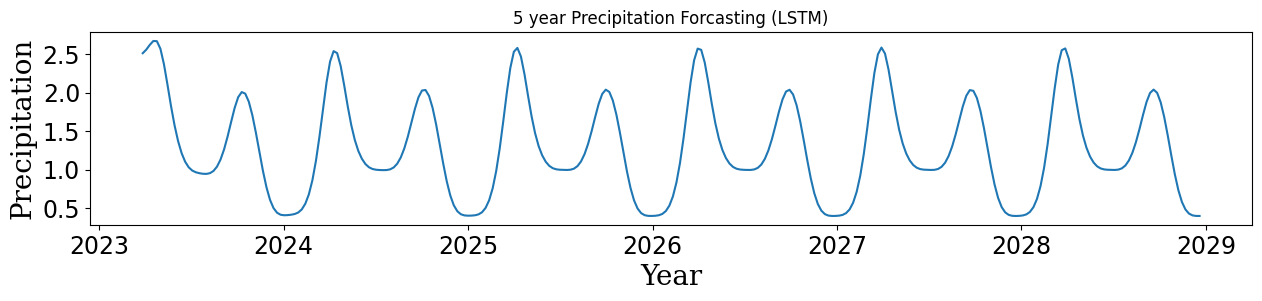

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
df_forecast['P_pred'].plot(figsize=(15, 2.5),title='5 year Precipitation Forcasting (LSTM)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("Precipitation",fontdict = font2)
#ax.legend(fontsize=17);

Text(0, 0.5, 'trange_pred')

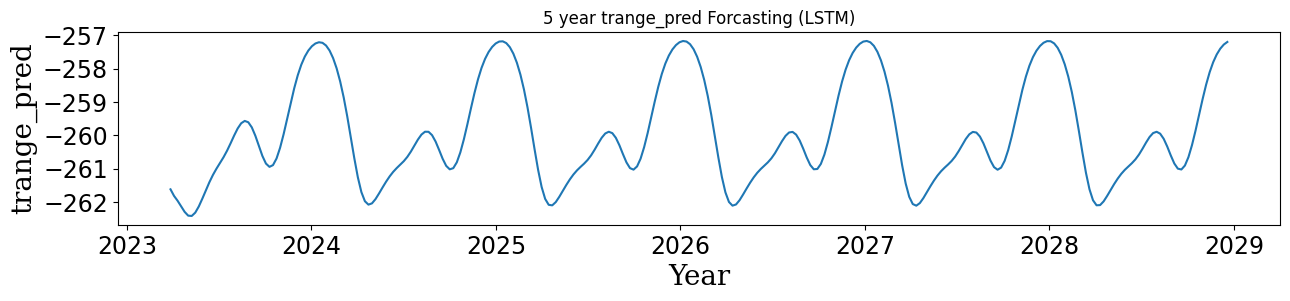

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
df_forecast['trange_pred'].plot(figsize=(15, 2.5),title='5 year trange_pred Forcasting (LSTM)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("trange_pred",fontdict = font2)
#ax.legend(fontsize=17);

Text(0, 0.5, 'tmin_pred')

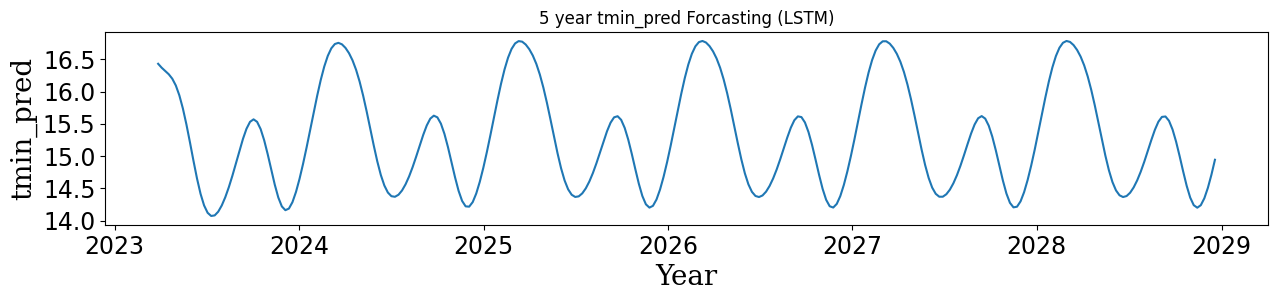

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
df_forecast['tmin_pred'].plot(figsize=(15, 2.5),title='5 year tmin_pred Forcasting (LSTM)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("tmin_pred",fontdict = font2)
#ax.legend(fontsize=17);

Text(0, 0.5, 'wmax_pred')

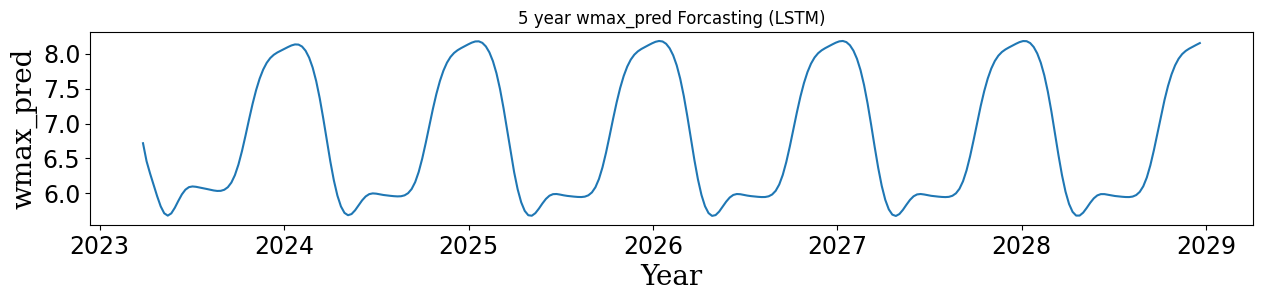

In [ ]:
# Plot
# ==============================================================================
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':20}

fig, ax = plt.subplots(figsize=(20, 2.5))
df_forecast['wmax_pred'].plot(figsize=(15, 2.5),title='5 year wmax_pred Forcasting (LSTM)',fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font2)
ax.set_ylabel("wmax_pred",fontdict = font2)
#ax.legend(fontsize=17);